In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt

from utils.visualization import data_count_plot
from utils.duplicates import find_near_duplicates, visualize_duplicates, get_duplicates_to_delete

from utils import data

### Loading Dataframe

In [2]:
base_path = '../data/raw/Furniture_Data'
df = data.load(base_path)

Loading tables...
Loading tables/Eclectic...
Loading tables/Midcentury...
Loading tables/Craftsman...
Loading tables/Victorian...
Loading tables/Transitional...
Loading tables/Mediterranean...
Loading tables/Traditional...
Loading tables/Industrial...
Loading tables/Farmhouse...
Loading tables/Tropical...
Loading tables/Southwestern...
Loading tables/Beach...
Loading tables/Modern...
Loading tables/Contemporary...
Loading tables/Rustic...
Loading tables/Scandinavian...
Loading tables/Asian...
Loading sofas...
Loading sofas/Eclectic...
Loading sofas/Midcentury...
Loading sofas/Craftsman...
Loading sofas/Victorian...
Loading sofas/Transitional...
Loading sofas/Mediterranean...
Loading sofas/Traditional...
Loading sofas/Industrial...
Loading sofas/Farmhouse...
Loading sofas/Tropical...
Loading sofas/Southwestern...
Loading sofas/Beach...
Loading sofas/Modern...
Loading sofas/Contemporary...
Loading sofas/Rustic...
Loading sofas/Scandinavian...
Loading sofas/Asian...
Loading lamps...
Loadi

In [ ]:
df.describe()

In [ ]:
df.head()

### Histogram Plot

In [ ]:
def plot_histogram(df, column_name, bins=20, title=None):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    plt.title(title or f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Plot histograms for numerical columns
plot_histogram(df, 'Width', title='Histogram of Image Widths')
plot_histogram(df, 'Height', title='Histogram of Image Heights')
plot_histogram(df, 'Ratio', title='Histogram of Image Ratios')

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

data_count_plot(df, 'Type', ax=ax[0][0], title='File Types', annotate=True, palette='Set2')
data_count_plot(df, 'Mode', ax=ax[0][2], title='Image Modes', annotate=True, palette='Accent')
data_count_plot(df, 'Class', ax=ax[1][1], horizontal=True, title='Classes', annotate=True, palette='Set1')
data_count_plot(df, 'Style', ax=ax[1][2], horizontal=True, title='Styles', annotate=True, palette='Set1')

fig.suptitle('Raw Dataset Statistics', fontsize=20, fontweight='bold', y=1.0)
fig.tight_layout()

---
## Duplicate handling

In [3]:
bed_set = df[df['Class'] == 'beds'].copy()

### Find all duplicates or similar images

In [4]:
duplicates = find_near_duplicates(bed_set, threshold=1)

Processing images: 100%|██████████| 6578/6578 [00:44<00:00, 147.53image/s, Duplicates=303, Current=../data/raw/Furniture_Data/beds/Asian/8103asian-canopy-beds.jpg]                               


### Visualize duplicates images to test

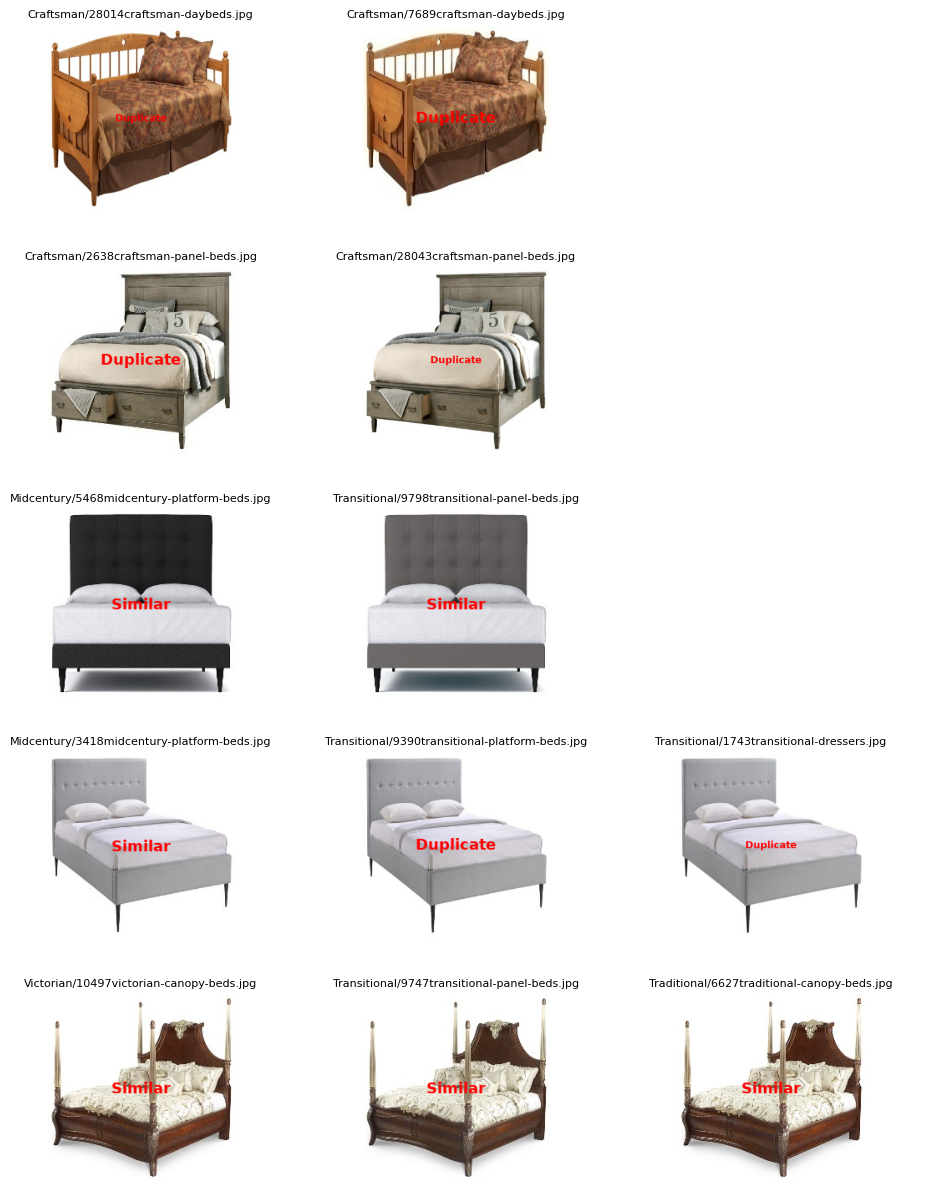

In [5]:
visualize_duplicates(duplicates, num_groups=5, start_group=1)

### Get duplicates to be deleted 

- This only includes "Duplicate" images (and not "Similar" images). 
- 1 "Duplicate" image from a Duplicate Group will be kept (not included in the output of duplicate_to_delete()).

In [7]:
to_be_deleted = get_duplicates_to_delete(duplicates)
to_be_deleted

,Duplicate_Group,First_Image_Path,Duplicate_or_Similar,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,1,beds/Craftsman/28014craftsman-daybeds.jpg,Duplicate,beds/Craftsman/7689craftsman-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Craftsman
1,2,beds/Craftsman/2638craftsman-panel-beds.jpg,Duplicate,beds/Craftsman/28043craftsman-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Craftsman
2,4,beds/Midcentury/3418midcentury-platform-beds.jpg,Duplicate,beds/Transitional/1743transitional-dressers.jpg,jpg,350,350,1.0,RGB,beds,Transitional
3,7,beds/Midcentury/3418midcentury-platform-beds.jpg,Duplicate,beds/Transitional/1743transitional-dressers.jpg,jpg,350,350,1.0,RGB,beds,Transitional
4,44,beds/Traditional/5003traditional-canopy-beds.jpg,Duplicate,beds/Traditional/29354traditional-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Traditional
5,84,beds/Farmhouse/2912farmhouse-daybeds.jpg,Duplicate,beds/Farmhouse/33437farmhouse-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Farmhouse
6,235,beds/Contemporary/426contemporary-loft-beds.jpg,Duplicate,beds/Contemporary/29494contemporary-loft-beds.jpg,jpg,350,350,1.0,RGB,beds,Contemporary
7,273,beds/Rustic/4754rustic-bed.jpg,Duplicate,beds/Rustic/8945rustic-panel-beds.jpg,jpg,224,224,1.0,RGB,beds,Rustic
8,298,beds/Asian/20750asian-comforters-and-comforter...,Duplicate,beds/Asian/3112asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian
9,299,beds/Asian/3413asian-platform-beds.jpg,Duplicate,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian


## Delete duplicates

In [8]:
# Uncomment below
# df = df[~df['Path'].isin(images_to_delete['Path'])]
